# LEADING Boot-Camp<br>Session 10: Unsupervised Learning

## Preface
This is a Jupyter notebook, which is an enhanced format that blends a capacity for computation and mathematical typesetting. You might be reading it rendered, e.g., into an html format&mdash;if you've never operated a Jupyter notebook before and do not have a configured Jupyter environment, you can quickly get started by copying [this Chapter to your own Google Drive](https://drive.google.com/file/d/1UfC6TAoPJCG4_AoncHCE2i3V5YcMjFQD/view?usp=sharing), and reviewing our Pre-Camp's [Preamble](https://drive.google.com/file/d/12_Kl7bSg0fkI7wnCxOr7y7bZ-eRrnYu1/view?usp=sharing), which discusses how to get started with Jupyter notebooks on Google Colab (or your own machine). 

But to review, __the code contained in this notebook will only work...__

1. __... on your own machine (e.g., laptop) if:__ 
- you have installed a Jupyter notebooks environment (see below in this [Preamble](https://drive.google.com/file/d/12_Kl7bSg0fkI7wnCxOr7y7bZ-eRrnYu1/view?usp=sharing)) copied this notebook and its adjacent `'./data/'` directory&mdash;including the packaged data files&mdash;such that everything is in the correct relative location.

2. __... on Google Colab if:__
  - you have done everying to ensure the relative directory structure from (1) above is in place on _your own Google Drive_, _and_ you have filled out and executed the below authentication (also discussed below in this [Preamble](https://drive.google.com/file/d/12_Kl7bSg0fkI7wnCxOr7y7bZ-eRrnYu1/view?usp=sharing)):
> ```
from google.colab import drive
drive.mount('/content/gdrive')
nbdir = "/content/gdrive/My Drive/path/to/this/notebook/"
```
  - as well as the following directory-change step (which must be specified to the naming conventions of _your_ Google Drive):
> ```
%cd /content/gdrive/My\ Drive/path/to/this/notebook/
```

## 10.0 Supervised and unsupervised ML
So far, you've received an introduction to supervised learning algorithms. Let's review these first at a high level to bring _unsupervised learning_ into context with what we've seen.

### 10.0.1 Supervised learning
With _supervised_ ML, there is some notion of 'truth', or, a _gold standard_ of labels for data. So, if we have $m$ rows of data, $x_1, \cdots, x_M$; they can _train_ an algorithm with &quot;supervision&quot; if a collection of $M$ truths or labels, $y_1, \cdots, y_M$ are known. For now, we'll stick to thinking of a gold standard as data labels and call them `y` in our code.

The goal with supervision is to produce an algorithm that takes an input row, $x_m$ and predicts a label (classification) or value (regression): $\hat{y_i}$. One of the first classification applications you might encounter every day is with e-mail detection and _SPAM_. Your e-mail host probably has an ML algorithm that makes a decision about every e-mail you receive, before you view it:

- Is e-mail $i$ a piece  of SPAM ($y_i=1$), or a genuine, &quot;good&quot; e-mail ($y_i=0$)?

This is called a _SPAM filter_, and generally, SPAM is labeled as `True`, i.e., as class $y = 1$, and the &quot;good stuff&quot; is labeled as `False`, i.e., as class $y = 0$. Specifically, this $0/1$ decision making is an instance of binary (2-label) classification.

### 10.0.2 Unsupervised Machine Learning
Knowing which algorithms fall into these different categories provides understanding on, e.g., which algorithms we can swap in/out as interchangeable (from a utility, i.e., not performance perspective). In some ways, one likely begins exploring unsupervised algorithms during first experiences with EDA. One way to look at unsupervised learning is:

> In unsupervised learning, there is just raw data, without any particular thing that is supposed to be predicted. 

So like we humans apply/use EDA as the identification of patterns in data, unsupervised learning covers algorithms that organize data by perceived patterns, without exact knowledge of what is &quot;correct&quot;. An archetypal ML task that commonly exemplifies unsupervised learning is called _clustering_. This automation task refers to

> grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). 

We'll explore this concept now through the $k$-means clustering algorithm.

## 10.1 Clustering algorithms

### 10.1.1 $k$-means clustering
Let's view of a row-column numeric dataset through the linear algebra framework as a collection of points (rows): $x_1, \cdots, x_M$, i.e., each $x_i$ is the $i^\text{th}$ row of data. With $k$-means clustering, the goal is to define $k$ clusters: $c_1, \cdots, c_k$; that group the $m$ data points as 'tightly' as possible.

### 10.1.1.1 Formal definition
Supposing you have an idea of where the clusters _center_ you can assign intelligent starting points, and if not you can just assign them randomly.Following this _initialization_, $k$-means goes back and fourth between two steps:

1. Expectation: re-assign all points to their _nearest_ cluster centers
2. Maximization: re-compute cluster centers as the centroids of clustered points.

So, suppose we begin with randomly placed cluster centers at $c^0_1, \cdots, c^0_k$. Then for any given point, $x$, the expectation (E) step begins with cluster assignment:

$$c^0(x) = \underset{d}{\text{argmin}}\{d(x,c^0_j)\}$$

where $d$ is the distance function, applied between the point and cluster centers. Generally, $d$ will be the Euclidean distance. Supposing our data set has $N$ columns (variables), to re-assign every single point, $x_m$ and every single cluster, $c_j$, the E-step requires a distance measurement:

$$d(x_m,c^0_j) = \|x_m - c^0_j\| = \sqrt{\sum_{n=1}^N(x_{m,n} - c^0_{j,n})^2}$$

The maximization (M) step then goes on to redefine cluster centers as the average locations of their constituents. So, for a cluster, $c_j$, with $N_j$ constituents, $x\in c_j$, updating the cluster's center from iteration $t$ to $t+1$ proceeds by the formula:

$$c^{t+1}_j = \frac{1}{N_j}\sum_{x\in c^t_j}^{N_j} x$$

This is a _very_ simple algorithm, requiring only a measure of distances between data points, and the notion of an average. Here, we've used the arithmetic mean. It's also a relatively intuitive algorithm, especially when viewed in a $2$-column, i.e., -dimensional scenario:

![Clustering Convergence](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

### 10.1.1.2 Setting up for $k$-means in Python
Here, we'll quickly go though a simple application of $k$-means based on the standard machine learning library, `sklearn`. To start out, let's move forward with some nice, ideal, cooked-up data. To do this, we'll start off our adventure with sklearn by using its `make_blobs()` function, which helps generate a sample of data to experiment on.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


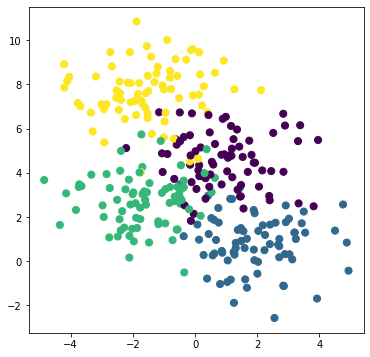

In [1]:
## we're going to do some plotting to see what we've got.
%matplotlib inline
from matplotlib import pyplot as plt

## import the cluster generation funciton
from sklearn.datasets.samples_generator import make_blobs

## the blobs are just centered groups of points
## the (2-d) points are the first output (a numpy array-matrix)
## and their labels are the second output array
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.25, random_state=0)

## let's plot the  blobs
fig = plt.figure(figsize = (6,6))
## did you know you can use c = point categories
## in the scatter function to have matplotlib
## automatically color points by membership?
_ = plt.scatter(X[:, 0], X[:, 1], s=50, c = y)

#### 10.1.1.3 Exploring how $k$-means works
Now that we've got our data, let's just start by exploring where the _empirical_ data centers are (not necessarily the 'true' centers used to generate the data). In other words, let's compute and plot the cluster centers in our picture.

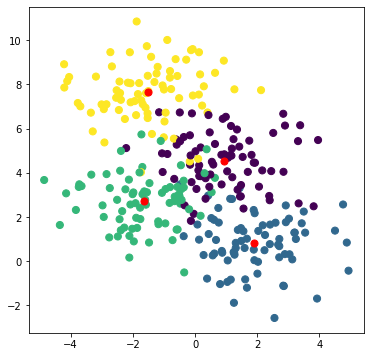

In [2]:
import numpy as np

## lists for the cluster centers
c_x = []
c_y = []

## loop over the possible labels
for label in set(y):
    ## slice out data rows by a boolean mask,
    ## checking to find the rows that match the current label
    ## store the x value
    c_x.append(np.mean(X[y==label, 0]))
    ## store the y value
    c_y.append(np.mean(X[y==label, 1]))

## initialize a picture
fig = plt.figure(figsize = (6,6))
## plot the data points
_ = plt.scatter(X[:, 0], X[:, 1], s=50, c = y)
## plot the cluster centers
_ = plt.scatter(c_x, c_y, s=50, color = "red")

What matters for the algorithm is: which points are closest to which centers?
Here, we'll investigate to see if all points would fall into their cluster's empirical center.
We'll plot the true labels next to the center-assigned labels to see what's changed.

In [3]:
## create an empty list of the closest-center-indices
## for each data point
y_closest_mean = []

## loop over  the rows of the data
for n in range(X.shape[0]):
    ## a crazy list comprehension to find the 
    ## distance-minimizing cluster center 
    ## for the current row of data
    y_closest_mean.append(
        min( ## use the min function
            [ ## make a list
                ( ## this will be a list of tuples
                    np.sqrt((X[n,:] - np.array(cxy))**2).sum(), ## compute the distance
                    m ## hold on to the cluster's index (it's label)
                ) 
                for m, cxy in enumerate(zip(c_x, c_y)) ## loop over the enumerated centers
            ]
        )[1] ## only take the cluster index from the minimizing tuple
    )

## convert our closest centers to a numpy array
y_closest_mean = np.array(y_closest_mean)

## print the labels to check our  work
print(y_closest_mean)

[2 3 0 3 0 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2 1 1 0 2 2 2 1 0 2 2 3 3 0 3 3 3 3
 3 2 1 2 2 3 0 2 2 3 2 3 1 2 1 3 1 0 2 3 2 3 1 3 0 3 2 2 2 3 1 3 2 0 0 3 2
 2 3 2 0 1 3 1 0 1 1 3 0 1 0 3 3 0 1 3 2 2 0 1 1 3 2 3 1 3 1 0 1 1 0 3 0 2
 2 1 3 1 1 3 1 0 3 0 1 0 1 0 1 1 2 1 2 3 2 2 1 3 2 2 3 2 3 3 2 1 3 0 2 3 2
 3 3 3 0 0 0 1 2 3 2 1 0 3 0 0 0 0 2 1 0 1 0 0 3 1 0 3 3 1 1 0 2 1 0 2 2 0
 0 0 0 1 3 2 2 0 0 2 2 2 1 2 3 0 0 1 2 0 2 2 3 0 0 0 2 0 0 3 2 2 1 1 0 3 1
 1 2 1 2 2 0 3 0 0 3 0 1 2 0 1 2 3 2 1 0 1 3 3 3 3 2 2 0 0 2 1 0 2 2 0 1 1
 3 0 0 2 1 3 2 0 3 0 1 1 2 2 1 1 1 1 0 3 3 1 1 1 1 1 1 3 0 3 0 1 1 3 3 3 1
 1 0 3 2]


As we can see when we color the points that were closer to a different cluster center red, many have indeed moved to the 'wrong' cluster. However, since this algorithm is unsupervised, there's no 'wrong' answers and likewise, not necessarily any reason we should expect $k = 4$ means to be meaningful. That is, $k$ is a _hyperparameter_, which we can potentially optimize by some other external metric, e.g., by a balance between the number of clusters and in-cluster variance.

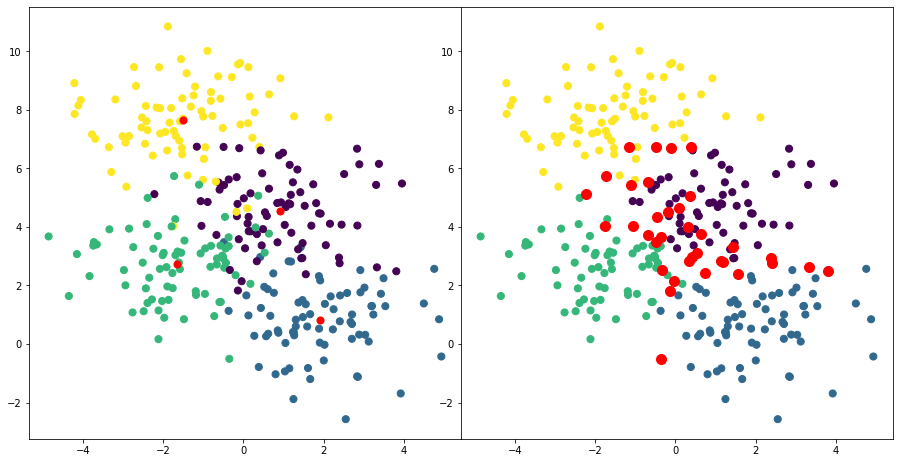

In [4]:
## initialize a wide figure
fig = plt.figure(figsize = (12,6))

## add the left axes
fig.add_axes([0,0,0.5,1])
## do scatter plots of the points and empirical centers
_ = plt.scatter(X[:, 0], X[:, 1], s=50, c = y)
_ = plt.scatter(c_x, c_y, s=50, color = "red")

## add the right axes
fig.add_axes([0.5,0,0.5,1])
## scatter plot the points if  their closest center is correct
_ = plt.scatter(
    X[y == y_closest_mean, 0], X[y == y_closest_mean, 1], 
    s=50, c = y[y == y_closest_mean]
)

## plot color of incorrect points over the red background points
_ = plt.scatter(
    X[y != y_closest_mean, 0], X[y != y_closest_mean, 1], 
    s=50, c = y_closest_mean[y != y_closest_mean]
)

## if their not correct, make a large, backing point that is red (highlighting)
_ = plt.scatter(
    X[y != y_closest_mean, 0], X[y != y_closest_mean, 1], 
    s=100, c = "red", alpha = 1
)

#### 10.1.1.4 Implementing $k$-means clustering
That would just be one iteration, and starting from the ideal center locations.
In general, the centers, $c_1,\cdots, c_k$ are placed randomly, and the algoirithm is allowed to proceed several times, i.e. for several iterations. This can be easily done with an sklearn module:

- http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

The algorithm has a few parameters of interest than can be tuned:

- `sklearn.cluster.KMeans(n_clusters=8, n_init=10, max_iter=300)`

Here, `n_clusters` is our $k$, and `max_iter` describes how many EM-cycles the algorithm should proceed for. The other parameter here: `n_init` refers to the number of random starts we allow the implementation to take. The final output from the `n_init` is determined by a best-clustering measure called _inertia_ that describes how tightly-packed the clusters are. Let's see how well it does with the default, `max_iter = 300` iterations.

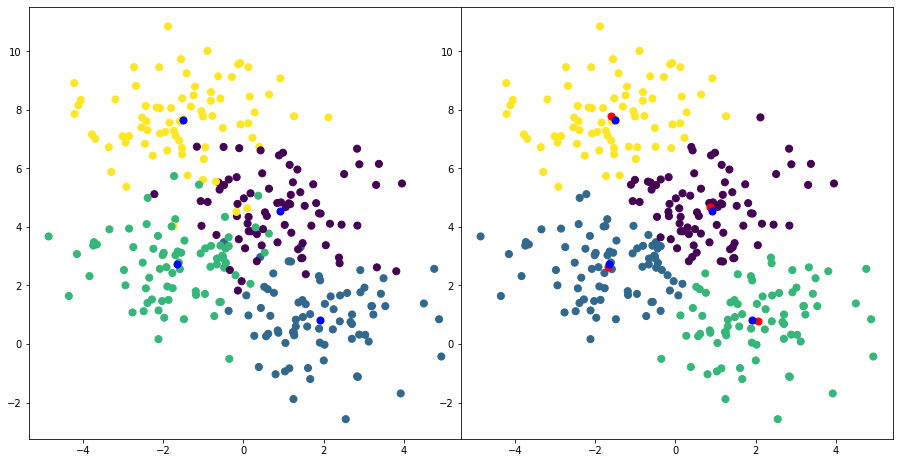

In [5]:
## get kmeans clustering from sklearn
from sklearn.cluster import KMeans

## initialize the algorithm
kmeans = KMeans(n_clusters=4)

## run the algorithm on the data
kmeans.fit(X)

## gather the predicted cluster labels
y_hat = kmeans.predict(X)

## make empty lists for the predicted cluster centers
model_c_x = []
model_c_y = []

## loop through the clusters and find their centers
for label in set(y_hat):
    model_c_x.append(np.mean(X[y_hat==label, 0]))
    model_c_y.append(np.mean(X[y_hat==label, 1]))
        
## initialize a wide figure
fig = plt.figure(figsize = (12,6))

## plot the original data and "true" centers
fig.add_axes([0,0,0.5,1])
_ = plt.scatter(X[:, 0], X[:, 1], s=50, c = y)
_ = plt.scatter(c_x, c_y, s=50, color = "blue")

## plot the modeled data and "predicted" centers
fig.add_axes([0.5,0,0.5,1])
_ = plt.scatter(X[:, 0], X[:, 1], s=50, c = y_hat)
_ = plt.scatter(model_c_x, model_c_y, s=50, color = "red")
_ = plt.scatter(c_x, c_y, s=50, color = "blue")

#### 10.1.1.4 Interpretation of clustering output
Some thoughts perhaps worth considering:
1. Our model re-numbers the clusters! Even if our data are unlabeled, $k$-means comes up with a totally new labeling for the cluster centers/names.
2. Not all data are easily clustered: here, clusters take spherical shapes.
3. What if we don't know what $k$ is?
4. How can this get better if we _do_ know true labels?

Let's go a little deeper here with the question in thought 3 above and see if we can choose $k$ optimally!

#### 10.1.1.5 Tuning the number of clusters
Ideally, if we can do this right we'll see that the 'best' number of clusters for our data set is $4$. But how? Well, one might asser the need for a simple model, i.e., one which relies on the smallest number of clusters possible to perform. We'll want to keep the 'tightest' clusters possible and this is measured by the 'inertia' parameter by `sklearn`. Indeed, this happens to be stored as an attribute in the model, once fit&mdash;just see model's [docs](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html): 

> Sum of squared distances of samples to their closest cluster center.

Let's plot the two two against each other to see if there's an ideal point, i.e., if $k=4$ is the most sensible.

best k of combined score:  4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


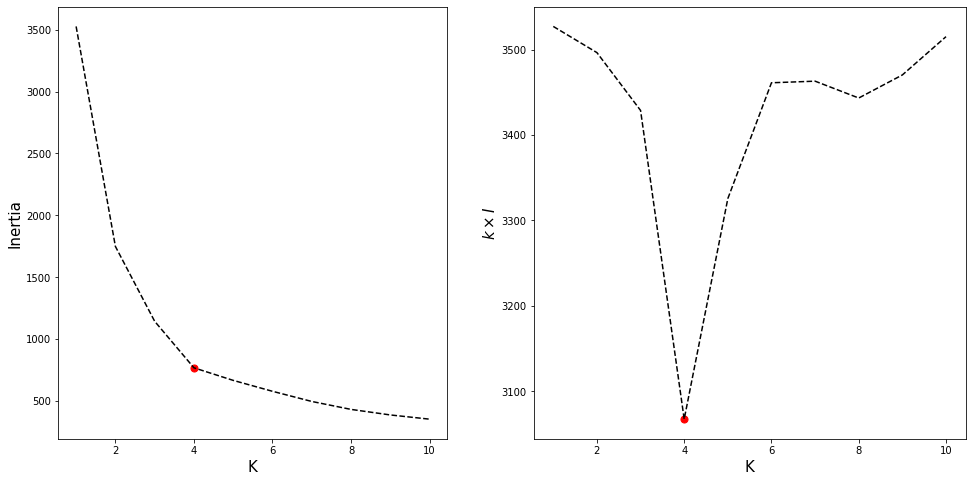

In [6]:
inertias = []
Ks = []
for K in range(1,11):
  ## initialize the algorithm
  kmeans = KMeans(n_clusters=K)
  ## run the algorithm on the data
  kmeans.fit(X)
  
  Ks.append(K)
  inertias.append(kmeans.inertia_)

## gather the best result
best_combined_score, best_K, best_inertia = min(zip([K*I for K, I in zip(Ks, inertias)], Ks, inertias))
print("best k of combined score: ", best_K)

## initialize a wide figure
fig = plt.figure(figsize = (12,6))

## plot the inertia vs cluster number
fig.add_axes([0,0,0.45,1])
_ = plt.plot(Ks, inertias, ls = 3, color = "black", linestyle = 'dashed')
_ = plt.scatter(best_K, best_inertia, s = 50, color = "red")
_ = plt.xlabel("K", fontsize = 15)
_ = plt.ylabel("Inertia", fontsize = 15)

## plot the inertia times cluster number
fig.add_axes([0.55,0,0.5,1])
_ = plt.plot(Ks, [K*I for K, I in zip(Ks, inertias)], ls = 3, color = "black", linestyle = 'dashed')
_ = plt.scatter(best_K, best_combined_score, s = 50, color = "red")
_ = plt.xlabel(r"K", fontsize = 15)
_ = plt.ylabel(r"$k \times I$", fontsize = 15)

As we can see in the above, factoring in the inertia&mdash;the error&mdash;with the model's _complexity_ (with respect to $k$) we're able to put together an overall cost function that determines how efficient/sensible $k$ clusters are.

### 10.1.2 Other Clustering Algorithms
$k$-means is just one of _many_ clustering algorithms which exist in the `sklearn` toolbox. For a full list, check out this link:
- https://scikit-learn.org/stable/modules/clustering.html

As we can see there, these clustering algorithms all operate with different built-in biases, and so may be better or worse, depending on the nature of the clustering problem:
![clustering-problems](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)

Another common old standard from this family is the hierarchical [agglomerative clustering algorithm](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering). Since it has this different, hierarchical structure it's worth it to go a little bit deeper and explore here.

#### 10.1.2.1 Hierarchical clustering
Their high-level description of the algorithm is quite clear:
> Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.

[From Wikipedia](https://en.wikipedia.org/wiki/Hierarchical_clustering#Agglomerative_clustering_example), we can see a reasonably simple "toy" graphical example. Supposing we have two feature dimensions to use for clustering, let's suppose the data lay out as follows:
![toy-data](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Clusters.svg/1280px-Clusters.svg.png)

Here, we should take that "b" is closest to "c", and "a" is the farthest from all others.


Each data point starts out in its own cluster, and the nearest pairs of clusters are successively merged to produce a dendrogram:
![toy-data-dendrogram](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Hierarchical_clustering_simple_diagram.svg/1920px-Hierarchical_clustering_simple_diagram.svg.png)

#### 10.1.2.2 Implementing hierarchical clustering
By default, the `AgglomerativeClustering` model in `sklearn` applies the `'ward'` clustering algorithm to merge next at any given time the pair of cluster will smallest merged variance. That is, if after merging down to a set of $k$ clusters, $\mathcal{C}_k$, the choice of $X,Y\in\mathcal{C}_k$ to merge as $Z_{k-1} = X\cup Y$ is given by the following minimization:
$$
(X,Y) = \min_{\mathcal{C}_{k}}\left\{\sum_{(x,y)\in X\times Y}\|x - y\|_2\middle| X,Y\in \mathcal{C}_k, X\neq Y\right\}
$$
The collection is then cut down to $\mathcal{C}_{k-1}$ by a set operation:
$$
\mathcal{C}_{k-1} = \left(\mathcal{C}_{k}\setminus\{X,Y\}\right)\cup\{Z_{k-1}\}
$$

With sklearn's implementation, we can again specify the number of clusters exactly using `n_clusters`, again:

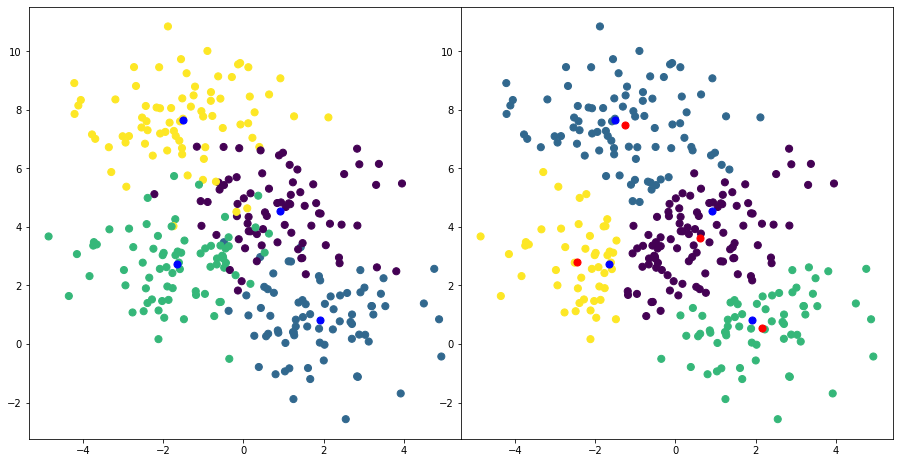

In [7]:
## get kmeans clustering from sklearn
from sklearn.cluster import AgglomerativeClustering

## initialize the algorithm
aggcluster = AgglomerativeClustering(n_clusters=4)

## run the algorithm on the data
aggcluster.fit(X)

## gather the predicted cluster labels
y_hat = aggcluster.labels_

## make empty lists for the predicted cluster centers
model_c_x = []
model_c_y = []

## loop through the clusters and find their centers
for label in set(y_hat):
    model_c_x.append(np.mean(X[y_hat==label, 0]))
    model_c_y.append(np.mean(X[y_hat==label, 1]))
        
## initialize a wide figure
fig = plt.figure(figsize = (12,6))

## plot the original data and "true" centers
fig.add_axes([0,0,0.5,1])
_ = plt.scatter(X[:, 0], X[:, 1], s=50, c = y)
_ = plt.scatter(c_x, c_y, s=50, color = "blue")

## plot the modeled data and "predicted" centers
fig.add_axes([0.5,0,0.5,1])
_ = plt.scatter(X[:, 0], X[:, 1], s=50, c = y_hat)
_ = plt.scatter(model_c_x, model_c_y, s=50, color = "red")
_ = plt.scatter(c_x, c_y, s=50, color = "blue")

But the algorithm likewise comes with the built-in ability to operate a `distance_threshold` argument, which clips the dendrogram at a specified level of error, which since the default method is `'ward'`, is a measurement of variance:
$$
d(X,Y) = \sum_{(x,y)\in X\times Y}\|x - y\|_2
$$
While a threshold like this does determine 'how many' clusters we'll get, we should ask: "how can we know what threshold to set?" Here, the remedyv is really knowing something about the problem, i.e., the units for the measure of variance, which can then be thresholded at a desired level of performance. However, if we don't know this, we're again stuck in the same position as before, where we can, e.g., take the sum of cluster variances as an overall norm of a given merge's clustering of $k$:
$$
\|\mathcal{C}_k\| = \sum_{X\in\mathcal{C}_k}\sum_{(x_i,x_j)\in X}\|x_i - x_j\|_2
$$
and then factor this in with $k$ again to determine where a model balances complexity with 'tightness'.

## 10.2 Representation learning
There are a wide variety of different unsupervised learning scenarios, but if you haven't noticed by now, unsupervised learning algorithms tend to exhibit a few methodological regularities. These include:
1. iterative tracking/compuation of summary statistics, like mean, variance, etc.
2. comparisons of data points according to different performance metrics, i.e., objective functions, and
3. optimization of objectives via maximization techniques.

So far, our optimization involves categorical update rules, based on modifying existing labels according which benefits the objective the most at any given time. But what if we find ourselves in the other scenario, i.e., if we have data labels, but no measurements of them? In other words, can we represent categories based on the ordering of instances of labels? In general, this is called [feature learning](https://en.wikipedia.org/wiki/Feature_learning), but we'll refer to this scenario as an opportunity to develop/deploy a _representation learning_ algorithm, since this is the nomenclature used in the straightforward text application context.

### 10.2.1 Representation learning and text
While there are certainly other representation-learning scenarios, a classic example domain for this that we can explore is text. To understand the need acutely, many natural language processing (NLP) tasks require knowing labels for individual words (e.g., parts of speech). However, determining labels, e.g., by some clustering or classification algorithm requires having access to _features_, or, a _representataion for each word in a given document. In other words, depending on the sequence-order of each word, $w_i$ in a text stream, e.g., for the sentence $s$:
$$
s = w_1, w_2, \cdots, w_{L - 1}, w_L
$$
we wish to have a $d$-dimensional _vector_, $v_{w_i}\in\mathbb{R}^{d}$ for each word.

Given the historical need for word representation in text, there are numerous algorithms to produce them&mdash;perhaps most famously&mdash;including [word2vec](https://arxiv.org/abs/1301.3781). However, one of the more-commonly used algorithms whose 'pre-trained' models you might run into a bit more often these days is called GloVe, which we'll explore both mathematically and computationally, next.




#### 10.2.1.1 The GloVe algorithm
The [GloVe algorithm](https://nlp.stanford.edu/pubs/glove.pdf) relies on having access to the non-zero _co-ocurrence_ frequencies, measured pairwise between the $N$ unique words in a corpus of documents. These co-occurrence frequencies are stored in a matrix, $X\in\mathbb{R}^{N\times N}$, to form the target variable of this unsupervised learning task. In particular, we can think of $X_{i,j}$ as the number of times word $i$ appeared 'near' word $j$ in a corpus of documents. Here, 'near' might be determined as words within the same sentence, or, window of $\pm m$ words, centering around each given word in the corpus. In this latter case, $m$ becomes a hyper-parameter for GloVe.

To model the values of $X$, the GloVe algorithm relies upon the existence of two collections&mdash;matrices&mdash;of word-representation vectors: $U,V\in\mathbb{R}^{N\times d}$ in addition to two bias vectors $\vec{a},\vec{b}\in\mathbb{R}^{N}$. Per the GloVe algorithm's definition, the goal is to choose the values of the representation matrices $U$ and $V$ by minimizing the loss function:

$$
\mathcal{L}(U,V) = \sum_{i = 1}^{N}\sum_{j = 1}^{N}f(X_{i,j})\left(\vec{u}_i^T\vec{v}_j + a_i + b_j - \log{X_{i,j}}\right)^{2}
$$
where $\vec{u}_i$ and $\vec{v}_j$ refer to the $i^\text{th}$ and $j^\text{th}$ rows of the matrices $U$ and $V$, respectively. The the co-occurrence frequeny weighting function, $f$, is defined as:
$$
f(X_{i,j}) = 1
\hspace{10pt}\text{ if } 
\hspace{10pt}X_{i,j} \geq X_{\text{max}};
\hspace{10pt}\text{ otherwise } 
\hspace{10pt}f(X_{i,j}) = \left(\frac{X_{i,j}}{X_{\text{max}}}\right)^{\alpha}.
$$
where $X_\text{max}$ and $\alpha$ are model hyper-parameters, typically set to $X_\text{max} = 100$ and $\alpha = 0.75$. 

So, why does the $\mathcal{L}$ loss function matter? Applying the expontial-logarithm inverse relationship to the argument of the squared terms of $\mathcal{L}$, we can see it measures the [likelihood ratio](https://en.wikipedia.org/wiki/Likelihood_function#Likelihood_ratio) for a _model of frequency_, namely:
$$
\hat{X}_{i,j} = e^{\vec{u}_i^T\vec{v}_j + a_i + b_j}
$$

This of course should make us ask, 'how are the values of $U$ and $V$ optimized?' Unlike our simple cluster cases, optimization here entails intensive use of calculus-based optimization algorithms, which are out of scope for our discussion. To get a sense for how this is done, a helpful place to start reading might be [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent), although a thorough treatment of calculus&mdash;particularly on partial derivatives and zero-finding&mdash;would be most helpful to have first. However, for our exploration, we'll continue by just loading a set of 'pre-trained' GloVe vectors next.

#### 10.2.1.2 Pre-trained GloVe representation
So, where can we get some 'good' GloVe word-representation vectors? Their [project's poge](https://nlp.stanford.edu/projects/glove/) hosts a good multi-purpose set of these vectors, a smallish set of which is already available with these notes locally via the file:
- `file_path = './data/glove.6B.50d.txt'`

To load these vectors, we'll need to save the vectors themselves in a matrix, which we'll call `GloVe_pretrained`, and build up as a list of lists. The other object we'll need is `GloVe_pretrained_index`, which is a dictionary that we'll use to record the row number for each vector in `GloVe_pretrained`. But we should ask, is this $U$ or $V$? As it turns out, it's customary to use the $U$ matrix from the GloVe algorithm. However, $V$ generally provides a reasonably-effective represenation, and the most effective is usually the concatenation $\left[U,V,\vec{a}^T,\vec{b}^T\right]$. Moreover, 'why' $U$ is better than $V$ is only dimly understood, but intuitively understood from predicting the $j$-row of $X_{i,j}$ in the model, which is the 'center' of the co-occurrence $\pm m$ window, which defines the model's objective.


In [10]:
# load the pre-trained 50-dimensional wikipedia GloVe vectors
import csv

GloVe_pretrained = []; GloVe_pretrained_index = {}

file_path = './data/glove.6B.50d.txt'
for line in open(file_path):
    row = line.split(" ")
    GloVe_pretrained.append(list(map(float, row[1:])))
    GloVe_pretrained_index[row[0]] = len(GloVe_pretrained_index)
    
GloVe_pretrained = np.array(GloVe_pretrained)

#### 10.2.1.3 Word vectors 'know' analogies
While the primary use of word vectors might usually be in NLP of information retrieval (IR) tasks, one curious aspect of them is that word vectors exhibit linear-semantic relationships. In other words, thay implicitly 'know' analogies. Let's see what this means!

Since we've now got some word vectors, we can go ahead with the [analogy test](https://arxiv.org/pdf/1301.3781.pdf) from the original word2vec algorithm's publication, which checks to see if SAT-like analogies can be completed via cosine-similarity comparison of vectors. For example, given the common analogy example:
> king is to man as woman is to queen

let's refer to `('man', 'king')` as the known `pair`, `woman` as the uknown's `predicate`, and `queen` as the unknown's `target` type. According to the word analogy test, 'good' word vectors will satisfy the relationship:
$$
\hat{v} = v_\text{king} - v_\text{man} + v_\text{woman} \sim v_\text{queen}
$$

Where $\sim$ is specifically measured as the cosine similarity. We can compute this easily for a set of vectors, `X`, and their `type_index`, and a specific analogy. This `test_analogy` function has arguments, named `pair`, `predicate`, and `target`. As output, the function computes the `rank` of the `target` type, according to the vocabulary decreasing sort, according to cosine similarity. 

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

def test_analogy(pair, predicate, target, type_index, X):
    
    vhat = (X[type_index[pair[1]],:] - X[type_index[pair[0]],:] + 
            X[type_index[predicate],:])

    sims = cosine_similarity(X, vhat.reshape(1, -1))[:, 0]

    types, sims = zip(*Counter({t: sims[type_index[t]] for t in type_index 
                                if t not in pair and t != predicate}).most_common())
    rank = types.index(target) + 1
    sim = sims[rank-1]

    return rank, sim

Not bad, it looks like it picks out the target word as the top (rank 1) prediction!

In [12]:
("pretrained rank, similarity: ", test_analogy(('man', 'he'), 'woman', 'she', GloVe_pretrained_index, GloVe_pretrained))

('pretrained rank, similarity: ', (1, 0.9373217383382935))

#### 10.2.1.4 How well does GloVe (Gigaword) know analogies, generally?
Following the original word2vec evaluation, we can collect the `analogies` from the [MSR](https://www.microsoft.com/en-us/research/people/) dat set (see [here](https://aclweb.org/aclwiki/Analogy_(State_of_the_art)) for more details) and load them as a dataframe:
```
>>> print(analogies.head())
   Unnamed: 0     type   word1   word2     word3    target
0           0   JJ_JJR    good  better     rough   rougher
1           1   JJR_JJ  better    good   rougher     rough
2           2   JJ_JJS    good    best     rough  roughest
3           3   JJS_JJ    best    good  roughest     rough
4           4  JJS_JJR    best  better  roughest   rougher
```
i.e., so that by column: `pair = (word1, word2)`, `predicate = word3`, and `target = target`.

Using these data, we can easily apply the `test_analogy` function. Then, use its `rank`  ($r$) output to compute a `score` as:
$$
\text{score} = 1 - \frac{r - 1}{|W|}
$$
Each computed `rank` and `score` then get appended into respective lists. The scores will provide a baseline idea of the GloVe's performance against random guessing, i.e., whereupon the list of `scores` should average to $\approx 0.5$.

In [13]:
import pandas as pd

# load the analogies
analogies = pd.read_csv('./data/msr.csv')

# measure performance scores and ranks for the 'correct' answer for each analogy
def analyze_analogies(analogies, type_index, X, num = 250, verbose = True):
    scores = []; ranks = []
    for i, row in analogies.sample(n=analogies.shape[0], random_state=691).iterrows():

        # only measure performance if all for words are in the vocabulary!
        if (row['word1'] in type_index and row['word2'] in type_index and
            row['word3'] in type_index and row['target'] in type_index):
            
            pair = (row['word1'], row['word2'])
            predicate = row['word3']; target = row['target']    
            rank, sim = test_analogy(pair, predicate, target, type_index, X)
            ranks.append(rank)
            score = 1 - (rank - 1)/len(type_index)
            scores.append(score)        
                
            if verbose and not len(scores) % int(num/10):
                print(100*len(scores)/num, "% complete")
            
            if len(scores) == num:
                break
    return scores, ranks

In [14]:
print("Analyzing pretrained-matrix output...")
pretrained_scores, pretrained_ranks = analyze_analogies(analogies, GloVe_pretrained_index, GloVe_pretrained)
print("done. average score: ", sum(pretrained_scores)/250) # note: 250 is the number of analogies to test

Analyzing pretrained-matrix output...
10.0 % complete
20.0 % complete
30.0 % complete
40.0 % complete
50.0 % complete
60.0 % complete
70.0 % complete
80.0 % complete
90.0 % complete
100.0 % complete
done. average score:  0.9957266700000004


While we haven't fully explored the utility of a GloVe representation in these notes, hopefully they've helped us to explore the kinds of information we can create to enrich the raw data, e.g., text, in our data science projects&mdash;just download a set of GloVe vectors, and you'll be all set to process!

However, to exit this section it's wise to mention that these 'pre-trained' resources are _learned from data_. This means that even if you're interested to use them in a specific context with whatever your project's bias and ethics considerations are, using GloVe&mdash;or any other pre-trained model&mdash;means that you'll be approaching _your_ projecty with all of the bias present the pre-trained model's data. So we should assume these 'Gigaword' GloVe vectors contain the biases of written text on English Wikipedia, since it was the source of data for pre-training. As it turns out, this has a profound effect on the specific analogies in the MSR data set, since Wikipedia is _biased_ to associate countries and capitols, i.e., political and geographic information!

So, what if we don't want to inject bias into our models from data? Well, to go even deeper into the 'unsupervised' universe we can explore entirely model-based learning strategies, which we discuss next.

## 10.3 Model-based learning
At this point you should be asking:
> Didn't we already learn about analogies in the bootcamp's __Introduction, Session 1__?

The answer: 'yes!' In fact, this is another reason why we've returned to the topic of analogies&mdash;our eploration of the analogies in __Session 1__ was actually a model-based learning experiment, which we can even compare to the unsupervised performance of the GloVe model. 

### 10.3.1 Comparing representations
In truth, the GloVe model's exponential frequency model is doing model-based learning:
$$
\hat{X}_{i,j} = e^{\vec{u}_i^T\vec{v}_j + a_i + b_j}
$$
but the determination of the matrices and vectors, e.g., $U$, that power it must be determined in an ad hoc fashion from data. The less we have to use data to inform a model like this, the more model-based the 'learning' can be thought to be. Think of these as being _more_ theory-based.

But recall that from __Session 1__ we can build a model of frequency simply by _theoretically_ sampling from a harmonically-weighted distribution of $N$ 'words'. The resulting 2nd-paradigm-style probabilistic model boiled down to the following result about analogies: 
 >Analogical pairs will have approximately equivalent ratios of ranks. 

Indeed, this is a _model_ for the analogies, i.e., not just the co-ocurrence frequencies! Let's see how ranking analogical predictions by _frequency ranks_ stacks up!

In [15]:
import numpy as np
import json

ranks = json.load(open('./data/google_books-ranks.json'))
freqs = np.load('./data/google_books-fs.npy')
rs = np.array([ranks[word] for word in ranks if word in GloVe_pretrained_index])
fs = np.array([freqs[ranks[word]-1] for word in ranks if word in GloVe_pretrained_index])
word_index = {word: i for i, word in enumerate([word for word in ranks if word in GloVe_pretrained_index])}
len(fs)

218312

Note: since Google Books covers _millions_ of tokens, we'll need to restrict to just those words the Gigaword (the GloVe algorithm's) data set covers.

#### 10.3.1.1 How well does _Google Books_ know analogies?

So returning to the canonical 'analogy' example, this would mean that:
$$
\frac{r_\text{king}}{r_\text{man}}\approx\frac{r_\text{queen}}{r_\text{woman}}
\hspace{15pt}
\Longrightarrow
\hspace{15pt}
\vec{v}_\text{king} - \vec{v}_\text{man} + \vec{v}_\text{woman} \approx \vec{v}_\text{queen}
$$

Moreover, we saw that this rank-ratio equivalence did approximately hold for the MSR data set of analogies. Coming back to _this_ (rank-ratio) analogical comparison method, we can estimate the _frequency rank_ of the target word via:
$$
\hat{r} = r_\text{woman}\frac{r_\text{king}}{r_\text{man}}\approx r_\text{queen}
\hspace{15pt}
$$
or, if we wanted to absorb more bias from the Google Books frequencies, just estimate the target word via ratios of frequencies:
$$
\hat{f} = f(\text{woman})\frac{f(\text{king})}{f(\text{man})}\approx f(\text{queen})
\hspace{15pt}
$$ 



In [16]:
def test_analogy_frequency(pair, predicate, target, rs, fs, type_index, frequency = False):
    if frequency:
      fhat = fs[type_index[predicate]]*(fs[type_index[pair[1]]]/fs[type_index[pair[0]]])
      dists = (fs - fhat)**2
    else:
      rhat = rs[type_index[predicate]]*(rs[type_index[pair[1]]]/rs[type_index[pair[0]]])
      dists = (rs - rhat)**2

    types, sims = zip(*Counter({w: 1/dists[type_index[w]] for w in type_index 
                                if w not in pair and w != predicate}).most_common())
    rank = types.index(target) + 1
    sim = sims[rank-1]

    return rank, sim

In [17]:
[("Google Books co-occurrence (frequency-rank-based) model analogy-rank, similarity: ", test_analogy_frequency(('man', 'he'), 'woman', 'she', rs, fs, word_index)),
("Google Books co-occurrence (frequency based) model analogy-rank, similarity: ", test_analogy_frequency(('man', 'he'), 'woman', 'she', rs, fs, word_index, frequency = True))]

[('Google Books co-occurrence (frequency-rank-based) model analogy-rank, similarity: ',
  (96, 0.0003503393202949812)),
 ('Google Books co-occurrence (frequency based) model analogy-rank, similarity: ',
  (19, 4.432315446642112e-16))]

Not bad&mdash;as we can see, it's easy enough to form a test for either of the frequency-rank- or frequency-based models of co-occurrence. But how do these analogical rankings perform, overall? We need another function!

In [18]:
# measure performance scores and ranks for the 'correct' answer for each analogy
def analyze_analogies_frequency(analogies, rs, fs, type_index, num = 250, verbose = True, frequency = False):
    scores = []; ranks = []
    for i, row in analogies.sample(n=analogies.shape[0], random_state=691).iterrows():
        # only measure performance if all for words are in the vocabulary!
        if (row['word1'] in type_index and row['word2'] in type_index and
            row['word3'] in type_index and row['target'] in type_index):
            
            pair = (row['word1'], row['word2'])
            predicate = row['word3']; target = row['target']    
            rank, sim = test_analogy_frequency(pair, predicate, target, rs, fs, type_index, frequency = frequency)
            ranks.append(rank)
            score = 1 - (rank - 1)/len(type_index)
            scores.append(score)        
                
            if verbose and not len(scores) % int(num/10):
                print(100*len(scores)/num, "% complete")
        
            if len(scores) == num:
                break
    return scores, ranks

In [19]:
print("Analyzing rank-frequency-based model output...")
model_scores, model_ranks = analyze_analogies_frequency(analogies, rs, fs, word_index)
print("done. average score: ", sum(model_scores)/250) # note: 250 is the number of analogies to test

Analyzing rank-frequency-based model output...
10.0 % complete
20.0 % complete
30.0 % complete
40.0 % complete
50.0 % complete
60.0 % complete
70.0 % complete
80.0 % complete
90.0 % complete
100.0 % complete
done. average score:  0.9579643446077174


As we can see, _overall_ performance drops when frequency is used (farther from one, below). This could be that the model's bias at _actual_ low frequencies, i.e., not just a model of ranks is less supportive of the linear-semantic operations.

In [20]:
print("Analyzing frequency-based model output...")
frequency_model_scores, frequency_model_ranks = analyze_analogies_frequency(analogies, rs, fs, word_index, frequency = True)
print("done. average score: ", sum(frequency_model_scores)/250) # note: 250 is the number of analogies to test

Analyzing frequency-based model output...
10.0 % complete
20.0 % complete
30.0 % complete
40.0 % complete
50.0 % complete
60.0 % complete
70.0 % complete
80.0 % complete
90.0 % complete
100.0 % complete
done. average score:  0.6507619187218292


#### 10.3.1.2 Interpretation
So what does this show? Well, we found that the Google Books frequency bias might affect the linear-semantic analogical relationships negatively, but as we know this also should depend on what biases are present in the data. Since Google Books is less 'knowledgable' about geography (by comparison to Wikipedia), we should infer that its frequencies are less informative about many of the analogies that the MSR data set covers. However, it's worth taking time to note how the analogy test performed quite well, when Google Books' word frequency-ranks were used, instead. This is a big 'win' for a model-based strategy, since it performs well (above 95%) while including much-less bias from data to get there. Looking at this a bit differently: it is _possible_ that using a model-based strategy can actually be _more effective_ than a pre-trained strategy, particularly when a pre-trained model's data is a poor match to the target prediction. In this case, the pre-trained model was actually a better fit to the _analogical_ predictions, since they include a lot of geography. But that might not always be the case, i.e., geography might not be in _your_ prediction set.

Finally, we should note that there is one point of non-comparability here, since we've run the GloVe-data's experiment on its entire vocabulary of $400,000$. This makes its denominator quite a bit larger than the $\sim200,000$ Google Books ranks, which results in GloVe's performace being automatically better (as a percentage). If we _really_ wanted to compare performance then technically we'd have to restrict _both_ to the common vocabulary in the `word_index`. This is left as an exercise to you!